### Prophet Model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
import logging
import cmdstanpy

# Set the logging level to WARNING
logging.getLogger(cmdstanpy.__package__).setLevel(logging.WARNING)

In [22]:
df_prop = pd.read_csv('dataframe.csv', index_col=0, parse_dates=True)
df_prop

,Cabbage,Green_Onion,Lettuce,Potatoes,Onion,Cucumber,Tomato,Chinese_Cabbage,Radish
2017-11-06,171.0,738.0,763.0,340.0,271.0,583.9,783.0,189.0,192.0
2017-11-13,198.0,738.0,909.0,340.0,271.0,583.9,771.0,195.0,190.0
2017-11-20,196.0,738.0,873.0,340.0,271.0,583.9,757.0,209.0,190.0
2017-11-27,207.0,738.0,969.0,340.0,271.0,583.9,762.0,236.0,204.0
2017-12-04,221.0,738.0,1109.0,340.0,271.0,583.9,794.0,243.0,215.0
...,...,...,...,...,...,...,...,...,...
2022-09-12,137.0,858.0,539.0,384.0,319.0,618.0,847.0,231.6,248.0
2022-09-19,141.0,854.0,580.0,380.0,311.0,591.0,867.0,232.4,250.3
2022-09-26,157.0,855.0,560.0,375.0,303.0,602.0,878.0,233.2,252.7
2022-10-03,162.0,814.0,545.0,375.0,298.0,602.0,897.0,234.0,255.0


In [23]:
# Split data into training and testing sets

train=df_prop.loc[:'2022-01-03']
test=df_prop.loc['2022-01-03':]

Cabbage
MAPE: 48.36%
MAE: 87.96
MSE: 9129.67
RMSE: 95.55 

Green_Onion
MAPE: 16.11%
MAE: 117.59
MSE: 18252.88
RMSE: 135.10 

Lettuce
MAPE: 25.48%
MAE: 113.73
MSE: 15976.45
RMSE: 126.40 

Potatoes
MAPE: 11.10%
MAE: 45.23
MSE: 3390.93
RMSE: 58.23 

Onion
MAPE: 19.40%
MAE: 84.16
MSE: 9703.53
RMSE: 98.51 

Cucumber
MAPE: 7.94%
MAE: 44.02
MSE: 4107.38
RMSE: 64.09 

Tomato
MAPE: 4.27%
MAE: 29.97
MSE: 1171.26
RMSE: 34.22 

Chinese_Cabbage
MAPE: 44.29%
MAE: 86.93
MSE: 7658.85
RMSE: 87.51 

Radish
MAPE: 38.21%
MAE: 81.54
MSE: 7280.16
RMSE: 85.32 



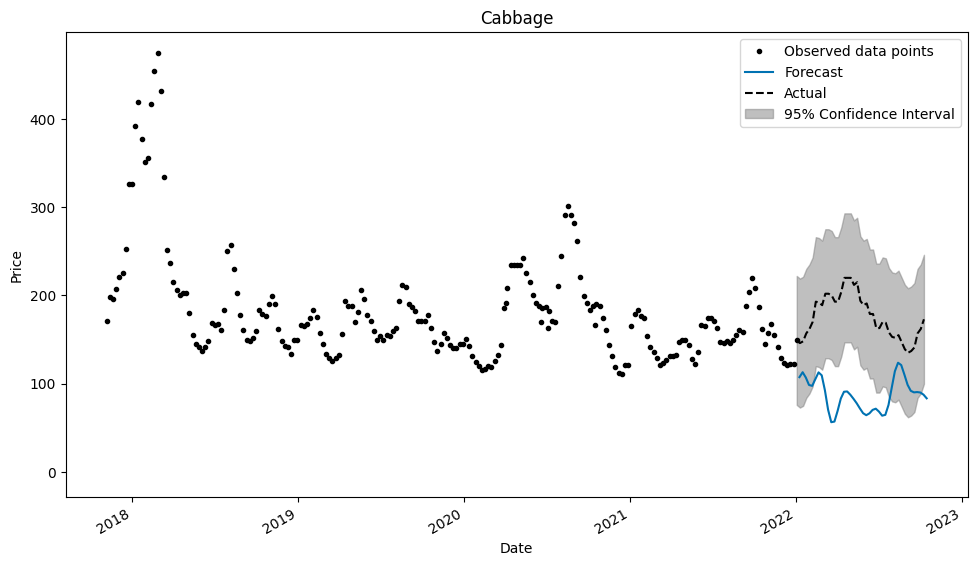

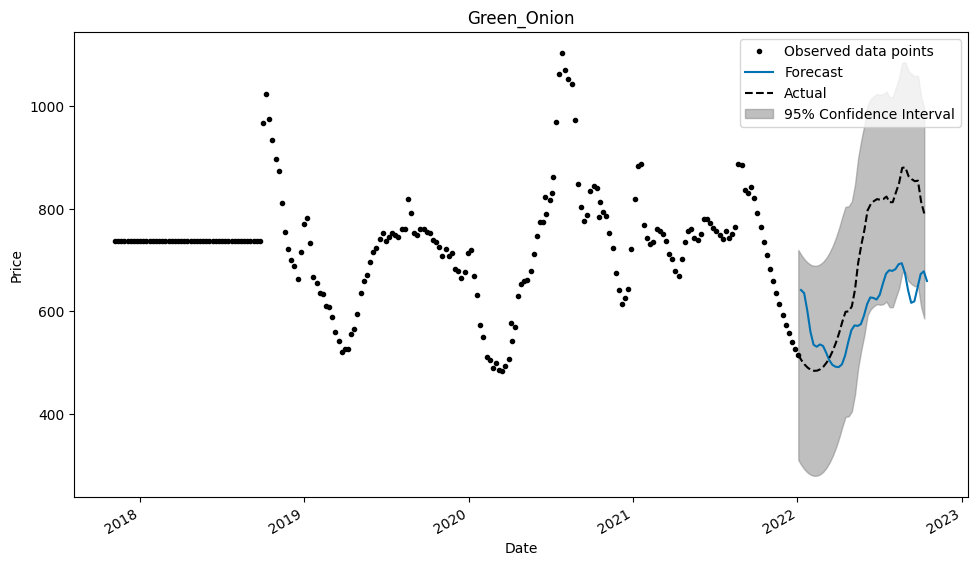

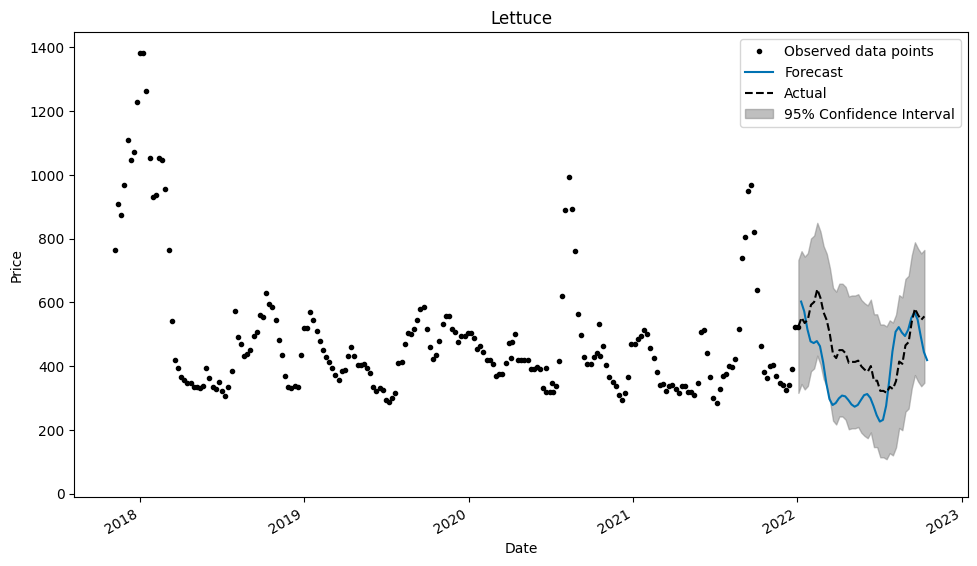

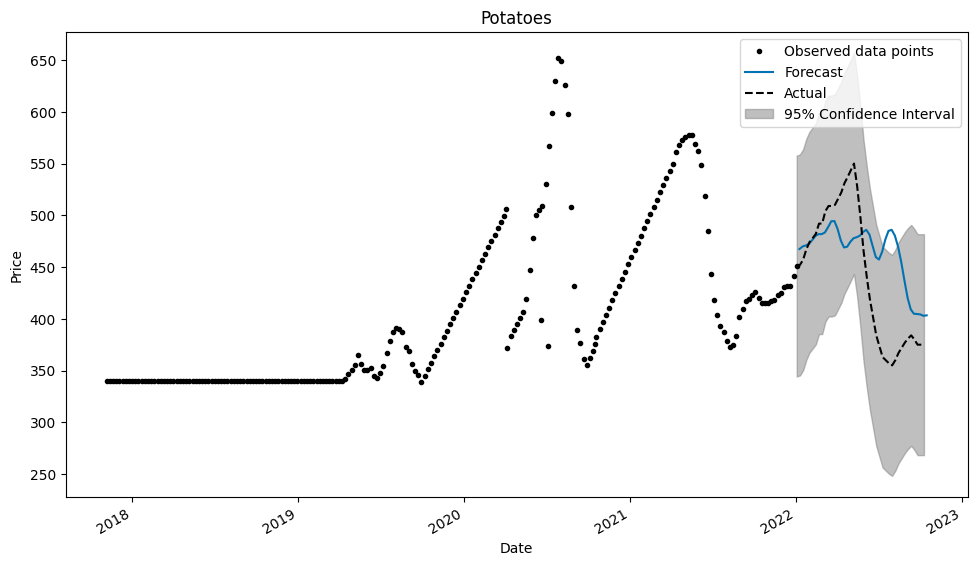

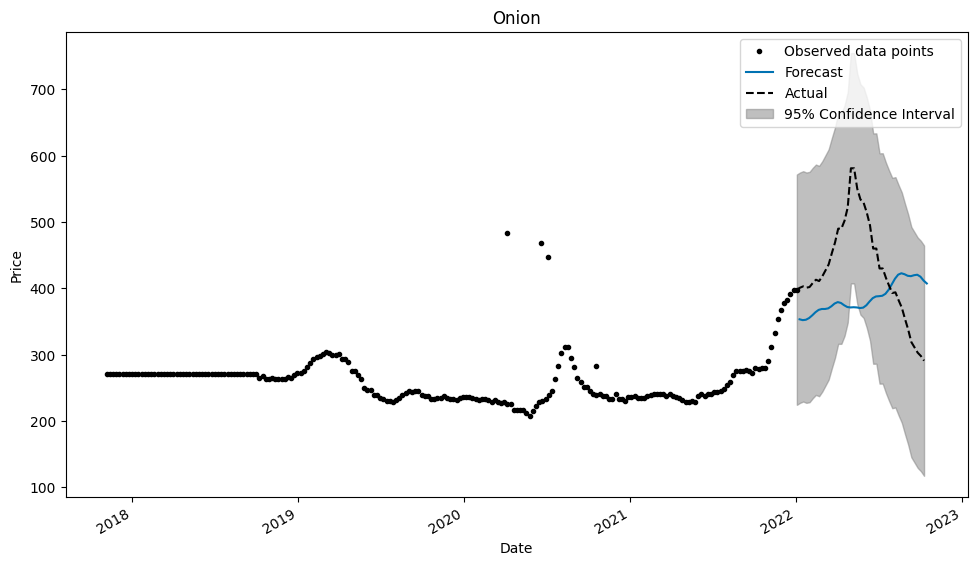

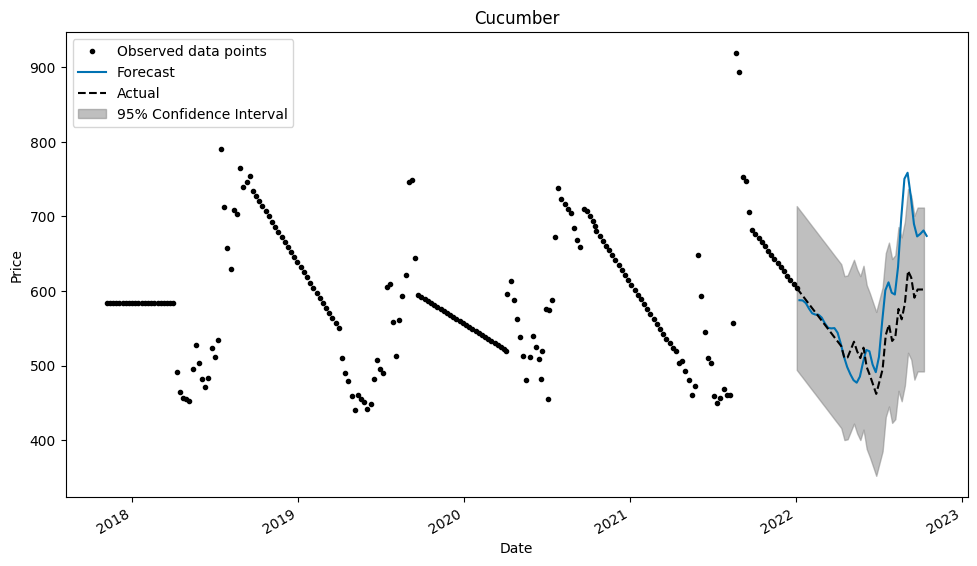

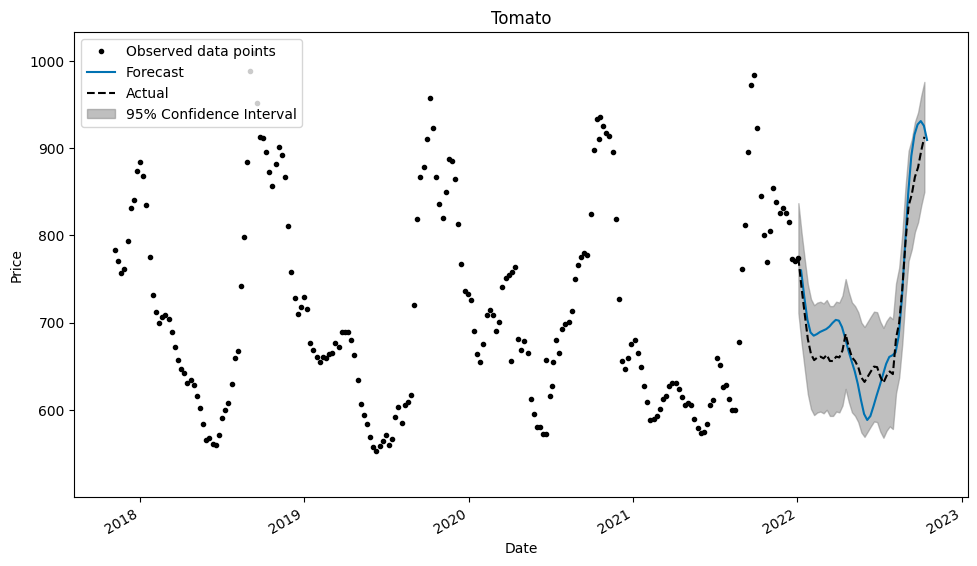

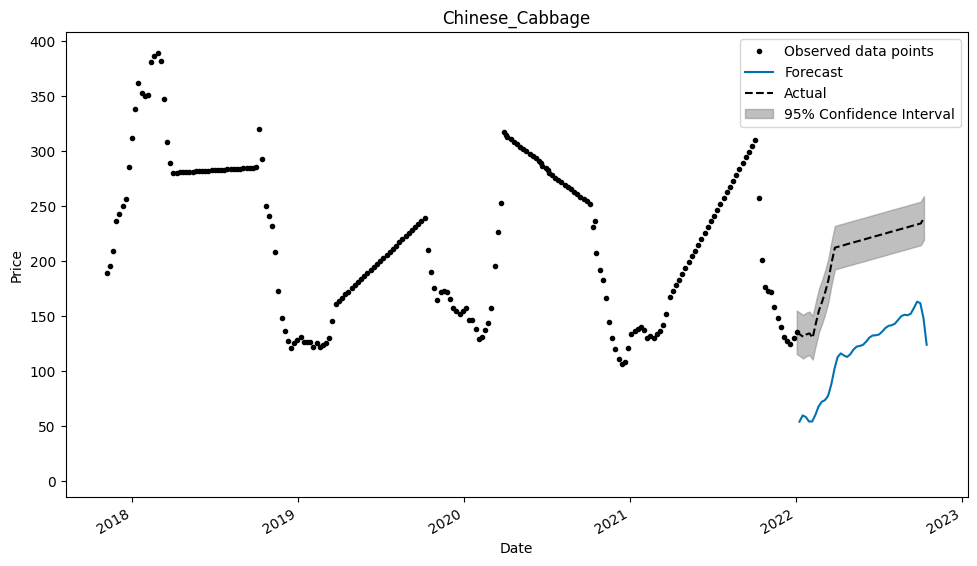

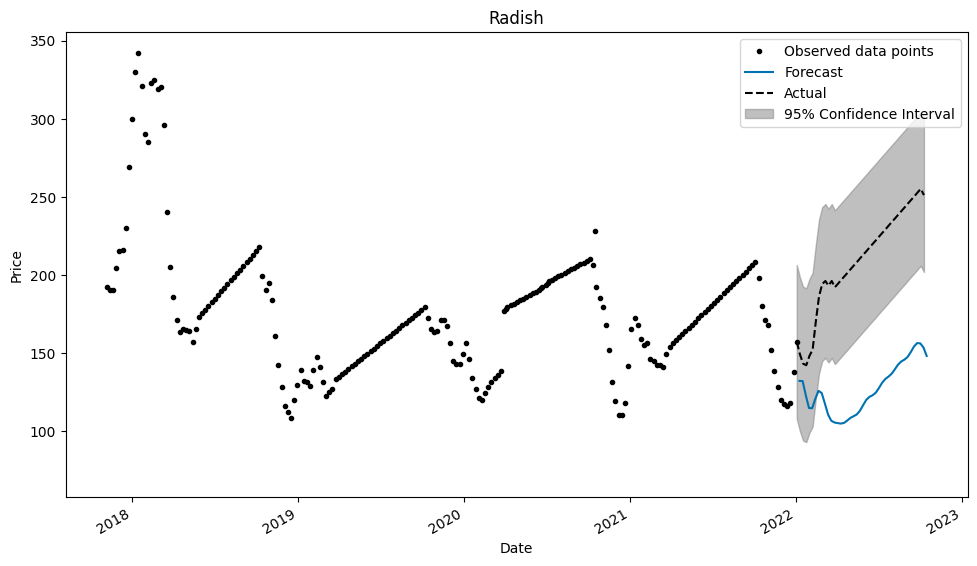

In [25]:
for column in df_prop.columns:
    # Train the model
    model = Prophet()
    df = pd.DataFrame({'ds': train.index, 'y': train[column].values})
    model.fit(df)
    
    # Make predictions on the test set
    future = model.make_future_dataframe(periods=len(test), freq='W')
    forecast = model.predict(future)[-len(test):]
    
    # Print the performance metrics
    print(column)
    print('MAPE: {:.2%}'.format(((abs(forecast['yhat'].values - test[column].values) / test[column].values).mean())))
    print('MAE: {:.2f}'.format(abs(forecast['yhat'].values - test[column].values).mean()))
    print('MSE: {:.2f}'.format(((forecast['yhat'].values - test[column].values) ** 2).mean()))
    print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(test[column].values, forecast['yhat'].values))),'\n')

    prediction_errors = test[column].values - forecast['yhat'].values
    std_dev = prediction_errors.std()
    lower_bound = test[column] - 1.96 * std_dev
    upper_bound = test[column] + 1.96 * std_dev

    # Plot the forecast and actual values
    fig = model.plot(forecast)
    ax = fig.gca()
    test[column].plot(ax=ax, label='Actual', color='k', linestyle='--')
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.fill_between(test.index, lower_bound, upper_bound, color='gray', alpha=0.5, label='95% Confidence Interval')
    ax.get_children()[2].remove()
    ax.legend()
    